In [1]:
import sys, os

import numpy as np
# Note that the path ./Albedo_project/data_processing is now in the path
import xarray as xr
from cloudpathlib import AnyPath
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Local Imports
curdir = os.getcwd()
print(curdir+"../data_processing")
sys.path.insert(0, curdir+"/../data_processing")
sys.path.insert(0, curdir+"/../visualization")
import ceres_ebaf
import ceres_ebaf_plotting

fig_path = AnyPath("../../Figs")
current_month_folder="23Aug"
base_path = AnyPath("/Users/mawa7160/dev/data/CERES/EBAF/")

color_4_2 = "cyan"
color_4_1 = "orange"
color_ocean = "blue"
color_land = "green"

/Users/mawa7160/Library/CloudStorage/OneDrive-UCB-O365/Documents/GitHub/Hemispheric-Albedo-Project/Albedo_project/Notebooks../data_processing


In [2]:
ebaf_4_1_file_path = base_path / current_month_folder / "CERES_EBAF-TOA_Ed4.1_Subset_200003-202203.nc"
ebaf_4_2_file_path = base_path / current_month_folder / "CERES_EBAF-TOA_Ed4.2_Subset_200003-202305.nc"

ebaf_4_1_full_years = xr.open_dataset(ebaf_4_1_file_path)
ebaf_4_2_full_years = xr.open_dataset(ebaf_4_2_file_path)

# Hemispheric Analysis

In [3]:
#Getting Version 4.1
solar_in_4_1 = ceres_ebaf.create_hemisphere_data(ebaf_4_1_full_years["solar_mon"], time_weighting=1, end_yr="2023")
shortwave_all_sky_4_1 = ceres_ebaf.create_hemisphere_data(ebaf_4_1_full_years["toa_sw_all_mon"], time_weighting=1, end_yr="2023")
shortwave_clear_sky_4_1 = ceres_ebaf.create_hemisphere_data(ebaf_4_1_full_years["toa_sw_clr_c_mon"], time_weighting=1, end_yr="2023")
cre_total_4_1 = shortwave_all_sky_4_1-shortwave_clear_sky_4_1

solar_diff_4_1 = solar_in_4_1["nh"]-solar_in_4_1["sh"]
cre_diff_4_1 = cre_total_4_1["nh"]-cre_total_4_1["sh"]
clear_sky_diff_4_1 = shortwave_clear_sky_4_1["nh"]-shortwave_clear_sky_4_1["sh"]
all_sky_diff_4_1 = shortwave_all_sky_4_1["nh"]-shortwave_all_sky_4_1["sh"]

# Getting Version 4.2
solar_in_4_2 = ceres_ebaf.create_hemisphere_data(ebaf_4_2_full_years["solar_mon"], time_weighting=1, end_yr="2023")
shortwave_all_sky_4_2 = ceres_ebaf.create_hemisphere_data(ebaf_4_2_full_years["toa_sw_all_mon"], time_weighting=1, end_yr="2023")
shortwave_clear_sky_4_2 = ceres_ebaf.create_hemisphere_data(ebaf_4_2_full_years["toa_sw_clr_c_mon"], time_weighting=1, end_yr="2023")
cre_total_4_2 = shortwave_all_sky_4_2-shortwave_clear_sky_4_2

solar_diff_4_2 = solar_in_4_2["nh"]-solar_in_4_2["sh"]
cre_diff_4_2 = cre_total_4_2["nh"]-cre_total_4_2["sh"]
clear_sky_diff_4_2 = shortwave_clear_sky_4_2["nh"]-shortwave_clear_sky_4_2["sh"]
all_sky_diff_4_2 = shortwave_all_sky_4_2["nh"]-shortwave_all_sky_4_2["sh"]

Data With Regression -0.019 W/m^2 per Year. With R^2 0.07045853483446987
Albedo Difference - EBAF Comparison -0.021 W/m^2 per Year. With R^2 0.0962314618708517


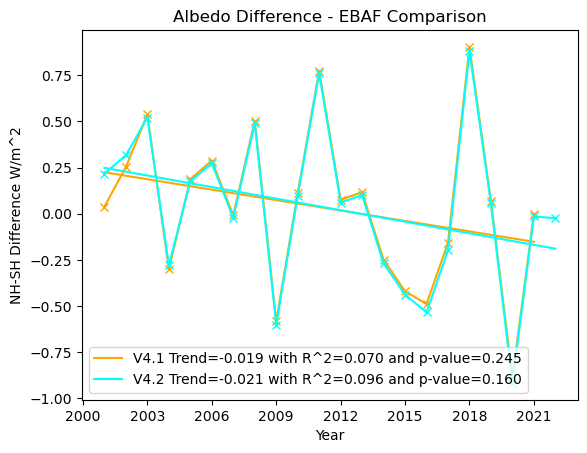

In [4]:
# Plotting the all sky difference in SW
ceres_ebaf_plotting.plot_data_with_reg_line(all_sky_diff_4_1.year, all_sky_diff_4_1, include_trends=True,
                                            tick_color=color_4_1, label="V4.1")

ceres_ebaf_plotting.plot_data_with_reg_line(all_sky_diff_4_2.year, all_sky_diff_4_2, include_trends=True,
                                            y_label="NH-SH Difference W/m^2", tick_color=color_4_2, label="V4.2",
                                            title="Albedo Difference - EBAF Comparison")
plt.savefig(fig_path / current_month_folder / "All-Sky-Difference-EBAF-Compare")

Data With Regression -0.043 W/m^2 per Year. With R^2 0.419932424778016
Clear Sky Difference - EBAF Comparison -0.041 W/m^2 per Year. With R^2 0.4373837701931091


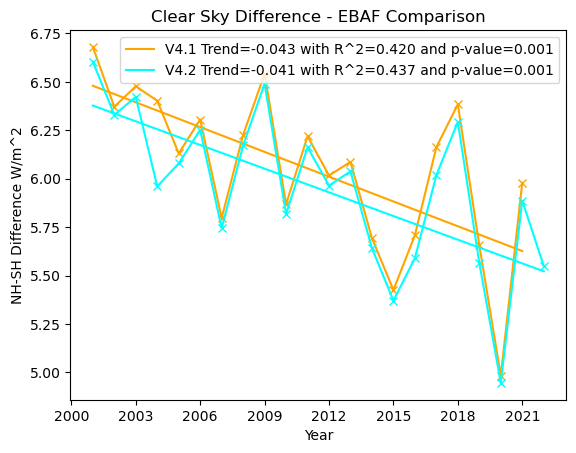

In [5]:
# Plotting the CRE in SW
ceres_ebaf_plotting.plot_data_with_reg_line(clear_sky_diff_4_1.year, clear_sky_diff_4_1, include_trends=True,
                                            y_label="NH-SH Difference W/m^2", tick_color=color_4_1, label="V4.1")

ceres_ebaf_plotting.plot_data_with_reg_line(clear_sky_diff_4_2.year, clear_sky_diff_4_2, include_trends=True,
                                            y_label="NH-SH Difference W/m^2", tick_color=color_4_2, label="V4.2",
                                            title="Clear Sky Difference - EBAF Comparison")

plt.savefig(fig_path / current_month_folder / "Clear-Sky-Difference-EBAF-Compare")

Data With Regression 0.024 W/m^2 per Year. With R^2 0.13229432080067943
Cloud Radiative Effect (All-Clear) Difference - EBAF Comparison 0.02 W/m^2 per Year. With R^2 0.1254397882832873


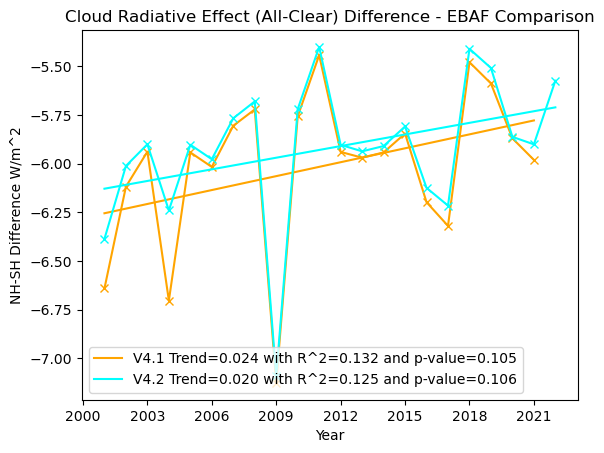

In [6]:
""# Plotting the CRE in SW
ceres_ebaf_plotting.plot_data_with_reg_line(cre_diff_4_1.year, cre_diff_4_1, include_trends=True, tick_color=color_4_1,
                                            label="V4.1")

ceres_ebaf_plotting.plot_data_with_reg_line(cre_diff_4_2.year, cre_diff_4_2, include_trends=True,
                                            y_label="NH-SH Difference W/m^2", tick_color=color_4_2, label="V4.2",
                                            title="Cloud Radiative Effect (All-Clear) Difference - EBAF Comparison")
plt.savefig(fig_path / current_month_folder / "CRE-Difference-EBAF-Compare")

# Zonal Analysis

# Land vs Ocean

In [7]:
mask_data_SSF1d = xr.open_dataset("/Users/mawa7160/dev/data/CERES/CERES_SSF1deg-Day_NOAA20-VIIRS_Ed1B_Subset_20230501-20230531.nc")
one_day = mask_data_SSF1d.sel(time=slice("2023-05-01"))
one_day_ocean_coverage = one_day["aux_ocean_daily"]
one_day_snow_coverage = one_day["aux_snow_daily"]

# fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))
# one_day["aux_ocean_daily"].plot(ax=axis, transform=ccrs.PlateCarree())

ocean_mask = ((one_day_ocean_coverage>75)[0]).astype(int)

In [9]:
shortwave_all_sky_ocean_masked = ceres_ebaf.create_hemisphere_data(ebaf_4_2_full_years["toa_sw_all_mon"],
                                                                             time_weighting=1,end_yr="2023",
                                                                             use_ocean_land=True, ocean_mask=ocean_mask)
shortwave_clear_sky_ocean_masked = ceres_ebaf.create_hemisphere_data(ebaf_4_2_full_years["toa_sw_clr_c_mon"],
                                                                                time_weighting=1, end_yr="2023",
                                                                                use_ocean_land=True, ocean_mask=ocean_mask)
cre_ocean_masked = shortwave_all_sky_ocean_masked - shortwave_clear_sky_ocean_masked

sw_all_hemi_ocean_diff = shortwave_all_sky_ocean_masked["nh_ocean"] - shortwave_all_sky_ocean_masked["sh_ocean"]
sw_all_hemi_land_diff = shortwave_all_sky_ocean_masked["nh_land"] - shortwave_all_sky_ocean_masked["sh_land"]

sw_clear_hemi_ocean_diff = shortwave_clear_sky_ocean_masked["nh_ocean"] - shortwave_clear_sky_ocean_masked["sh_ocean"]
sw_clear_hemi_land_diff = shortwave_clear_sky_ocean_masked["nh_land"] - shortwave_clear_sky_ocean_masked["sh_land"]

sw_cre_hemi_ocean_diff = cre_ocean_masked["nh_ocean"] - cre_ocean_masked["sh_ocean"]
sw_cre_hemi_land_diff = cre_ocean_masked["nh_land"] - cre_ocean_masked["sh_land"]

Data With Regression -0.041 W/m^2 per Year. With R^2 0.1467043415903545
Data With Regression -0.021 W/m^2 per Year. With R^2 0.0962314618708517
Albedo Difference - Land vs Ocean 0.004 W/m^2 per Year. With R^2 0.0017537519609681852


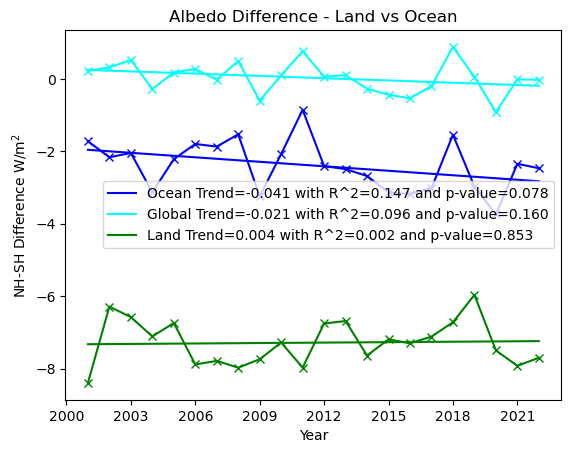

In [10]:
# Plotting the all sky difference in SW
ceres_ebaf_plotting.plot_data_with_reg_line(sw_all_hemi_ocean_diff.year, sw_all_hemi_ocean_diff,
                                            include_trends=True, tick_color=color_ocean, label="Ocean")
ceres_ebaf_plotting.plot_data_with_reg_line(all_sky_diff_4_2.year, all_sky_diff_4_2, include_trends=True,
                                            tick_color=color_4_2, label="Global")
ceres_ebaf_plotting.plot_data_with_reg_line(sw_all_hemi_land_diff.year, sw_all_hemi_land_diff, include_trends=True,
                                            y_label="NH-SH Difference W/m$^2$", tick_color=color_land, label="Land",
                                            title="Albedo Difference - Land vs Ocean")

plt.savefig(fig_path / current_month_folder / "All-Sky-Difference-Land-Ocean")

Data With Regression -0.101 W/m^2 per Year. With R^2 0.58314082237958
Data With Regression -0.06 W/m^2 per Year. With R^2 0.49726878159850374
Data With Regression -0.055 W/m^2 per Year. With R^2 0.6006061802356736
Data With Regression -0.059 W/m^2 per Year. With R^2 0.274061002759359


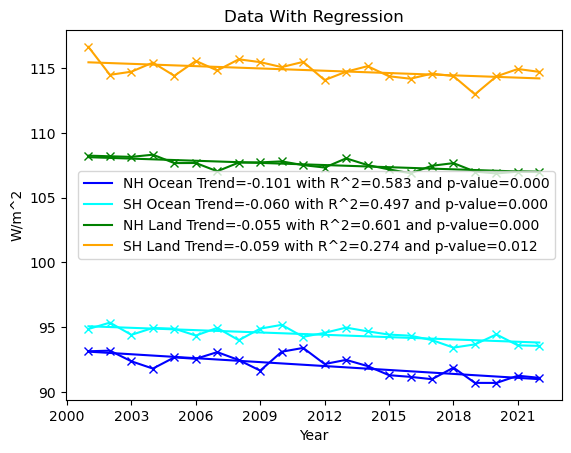

In [15]:

# Plotting the all sky difference in SW
ceres_ebaf_plotting.plot_data_with_reg_line(shortwave_all_sky_ocean_masked["nh_ocean"].year, shortwave_all_sky_ocean_masked["nh_ocean"],
                                            include_trends=True, tick_color=color_ocean, label="NH Ocean")
ceres_ebaf_plotting.plot_data_with_reg_line(shortwave_all_sky_ocean_masked["sh_ocean"].year, shortwave_all_sky_ocean_masked["sh_ocean"], include_trends=True,
                                            tick_color=color_4_2, label="SH Ocean")

# Plotting the all sky difference in SW
ceres_ebaf_plotting.plot_data_with_reg_line(shortwave_all_sky_ocean_masked["nh_land"].year, shortwave_all_sky_ocean_masked["nh_land"],
                                            include_trends=True, tick_color="green", label="NH Land")
ceres_ebaf_plotting.plot_data_with_reg_line(shortwave_all_sky_ocean_masked["sh_land"].year, shortwave_all_sky_ocean_masked["sh_land"], include_trends=True,
                                            tick_color="orange", label="SH Land")

Data With Regression -0.027 W/m^2 per Year. With R^2 0.3633933447497071
Data With Regression -0.041 W/m^2 per Year. With R^2 0.4373837701931091
Clear Sky Difference - Land vs Ocean -0.043 W/m^2 per Year. With R^2 0.1807897839584719


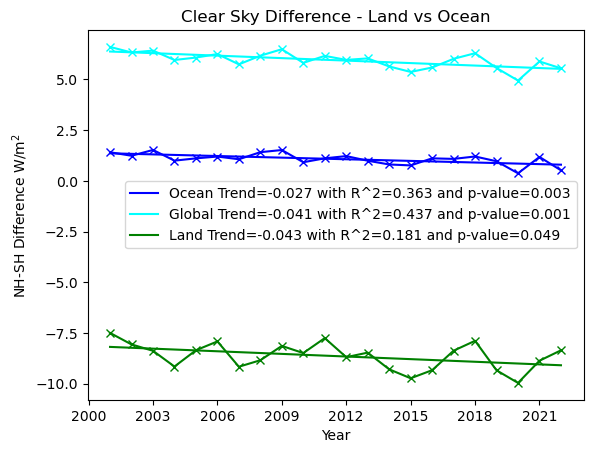

In [11]:
# Plotting the all sky difference in SW
ceres_ebaf_plotting.plot_data_with_reg_line(sw_clear_hemi_ocean_diff.year, sw_clear_hemi_ocean_diff,
                                            include_trends=True, tick_color=color_ocean, label="Ocean")
ceres_ebaf_plotting.plot_data_with_reg_line(clear_sky_diff_4_2.year, clear_sky_diff_4_2,
                                            include_trends=True, tick_color=color_4_2, label="Global")
ceres_ebaf_plotting.plot_data_with_reg_line(sw_clear_hemi_land_diff.year, sw_clear_hemi_land_diff,
                                            include_trends=True, y_label="NH-SH Difference W/m$^2$", tick_color=color_land,
                                            label="Land", title="Clear Sky Difference - Land vs Ocean")

plt.savefig(fig_path / current_month_folder / "Clear-Sky-Difference-Land-Ocean")

Data With Regression -0.015 W/m^2 per Year. With R^2 0.02302636230605522
Data With Regression 0.02 W/m^2 per Year. With R^2 0.1254397882832873
CRE Difference - Land vs Ocean 0.047 W/m^2 per Year. With R^2 0.09899684728831604


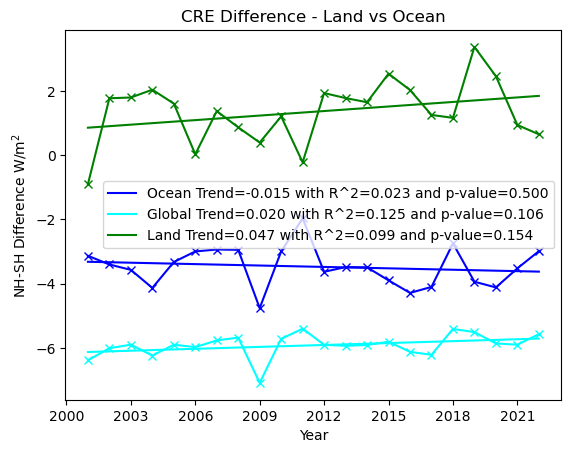

In [12]:
# Plotting the all sky difference in SW
ceres_ebaf_plotting.plot_data_with_reg_line(sw_cre_hemi_ocean_diff.year, sw_cre_hemi_ocean_diff,
                                            include_trends=True, tick_color=color_ocean, label="Ocean")
ceres_ebaf_plotting.plot_data_with_reg_line(cre_diff_4_2.year, cre_diff_4_2,
                                            include_trends=True, tick_color=color_4_2, label="Global")
ceres_ebaf_plotting.plot_data_with_reg_line(sw_cre_hemi_land_diff.year, sw_cre_hemi_land_diff,
                                            include_trends=True, y_label="NH-SH Difference W/m$^2$", tick_color=color_land,
                                            label="Land", title="CRE Difference - Land vs Ocean")

plt.savefig(fig_path / current_month_folder / "CRE-Difference-Land-Ocean")

In [ ]:
# Plotting the all sky difference in SW
ceres_ebaf_plotting.plot_data_with_reg_line(sw_cre_hemi_ocean_diff.year, sw_cre_hemi_ocean_diff,
                                            include_trends=True, tick_color=color_ocean, label="Ocean")
ceres_ebaf_plotting.plot_data_with_reg_line(cre_diff_4_2.year, cre_diff_4_2,
                                            include_trends=True, tick_color=color_4_2, label="Global")
ceres_ebaf_plotting.plot_data_with_reg_line(sw_cre_hemi_land_diff.year, sw_cre_hemi_land_diff,
                                            include_trends=True, y_label="NH-SH Difference W/m$^2$", tick_color=color_land,
                                            label="Land", title="CRE Difference - Land vs Ocean")

plt.savefig(fig_path / current_month_folder / "CRE-Difference-Land-Ocean")